# **PLN - Modelo de processo de linguagêm natural**

**Análise de sentimento tweets - Vacina AstraZeneca**

In [ ]:
# Carregando pacotes
!pip install watermark

In [1]:
# Versão do python
from platform import python_version

print('Versão Jupyter Notebook neste projeto:', python_version())

Versão Jupyter Notebook neste projeto: 3.8.8


In [2]:
#Importação das bibliotecas

# Bibliotecas para NLTK
import nltk
import re
import wordcloud
import itertools
from wordcloud import WordCloud

import pandas as pd # Carregamento de arquivos de csv
import numpy as np # Carregamento cálculos em arrays multidimensionais

# Bibliotecas de visualização
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar as versões das bibliotecas
import watermark

# Warnings retirar alertas 
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Baixando pacote do punkt

import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrador\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrador\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# Verficações da versões das bibliotecas

%reload_ext watermark
%watermark -a "Rafael Gallo" --iversions

Author: Rafael Gallo

nltk      : 3.6.1
pandas    : 1.2.4
numpy     : 1.19.5
wordcloud : 1.8.1
matplotlib: 3.3.4
watermark : 2.3.0
seaborn   : 0.11.1
re        : 2.2.1



In [5]:
# Configuração fundo dos gráficos e estilo, tamanho da fonte

sns.set_palette("Accent")
sns.set(style="whitegrid", color_codes=True, font_scale=1.3)
color = sns.color_palette()

# **Base dados**

In [6]:
# Carregando a base de dados
df = pd.read_csv("Vaccine Tweets-AstraZeneca.csv")

In [7]:
# Exebindo o 5 primeiro dados 
df.head(5)

,Unnamed: 0,Tweet,Subjectivity,Polarity,Score
0,0,"Respiratory syncytial virus, or RSV, is a comm...",0.5,-0.300000,Negative
1,1,"As pioneers in asthma, we continue to push the...",0.0,0.000000,Neutral
2,2,It takes innovation to transform healthcare ex...,0.0,0.000000,Neutral
3,3,Every day billions of people are trying to bal...,0.0,0.000000,Neutral
4,4,An estimated 37 million people live with chron...,0.5,0.136364,Positive


In [8]:
# Exebindo o 5 últimos dados
df.tail(5)

,Unnamed: 0,Tweet,Subjectivity,Polarity,Score
3144,3144,Good morning ERSCongress! Find out more about ...,0.550000,0.687500,Positive
3145,3145,"Morning everyone, here's to another great day ...",0.750000,1.000000,Positive
3146,3146,The value of social media to is in having an ...,0.066667,0.033333,Positive
3147,3147,I'm a patient advocate and a new member. Than...,0.551515,0.278788,Positive
3148,3148,SevereAsthma is a heterogeneous disease charac...,0.000000,0.000000,Neutral


In [9]:
# Número de linhas e colunas 
df.shape

(3149, 5)

In [10]:
# Exibido os tipos de dados
df.dtypes

Unnamed: 0        int64
Tweet            object
Subjectivity    float64
Polarity        float64
Score            object
dtype: object

In [11]:
# Informando as informações e das variaveis 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3149 entries, 0 to 3148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    3149 non-null   int64  
 1   Tweet         3149 non-null   object 
 2   Subjectivity  3149 non-null   float64
 3   Polarity      3149 non-null   float64
 4   Score         3149 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 123.1+ KB


In [12]:
# Total de colunas e linhas 

print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

Rows: 3149
Columns: 5


In [13]:
# Exibindo valores ausentes e Valores únicos

print("\nMissing values :  ", df.isnull().sum().values.sum())
print("\nUnique values :  \n",df.nunique())


Missing values :   0

Unique values :  
 Unnamed: 0      3149
Tweet           3117
Subjectivity     336
Polarity         354
Score              3
dtype: int64


In [14]:
# Polaridade do coluna 
df.Polarity

0      -0.300000
1       0.000000
2       0.000000
3       0.000000
4       0.136364
          ...   
3144    0.687500
3145    1.000000
3146    0.033333
3147    0.278788
3148    0.000000
Name: Polarity, Length: 3149, dtype: float64

In [15]:
# Contando números de dados
df.Polarity.value_counts()

0.000000    1260
0.500000     194
0.250000     131
0.136364      88
0.100000      80
            ... 
0.013333       1
0.933333       1
0.404167       1
0.089744       1
0.187778       1
Name: Polarity, Length: 354, dtype: int64

In [16]:
# Total de número duplicados
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3144    False
3145    False
3146    False
3147    False
3148    False
Length: 3149, dtype: bool

In [17]:
# Variação imparcial
df.var()

Unnamed: 0      826612.500000
Subjectivity         0.103726
Polarity             0.062196
dtype: float64

In [18]:
# Contagem de dados da coluna account_length

df.groupby(['Subjectivity'])['Polarity'].count()

Subjectivity
0.000000    977
0.033333      2
0.041667      2
0.047619      1
0.050000      9
           ... 
0.933333      1
0.937500      2
0.950000     16
0.975000      1
1.000000    188
Name: Polarity, Length: 336, dtype: int64

In [19]:
# Renomeando as colunas do dataset

df.columns = ["Usuario",
              "Text",
              "Subjetividade",
              "Polaridade",
              "Sentimento"]
df.head()

,Usuario,Text,Subjetividade,Polaridade,Sentimento
0,0,"Respiratory syncytial virus, or RSV, is a comm...",0.5,-0.300000,Negative
1,1,"As pioneers in asthma, we continue to push the...",0.0,0.000000,Neutral
2,2,It takes innovation to transform healthcare ex...,0.0,0.000000,Neutral
3,3,Every day billions of people are trying to bal...,0.0,0.000000,Neutral
4,4,An estimated 37 million people live with chron...,0.5,0.136364,Positive


In [20]:
# Contagem de dados da coluna na Sentimento
df.Sentimento.count()

3149

In [21]:
# Contagem de dados da coluna na Subjetividade
df.Subjetividade.count()

3149

In [22]:
# Contagem de dados da coluna na Polaridade
df.Polaridade.count()

3149

In [23]:
# Contagem de dados da coluna na texto
df.Text.count()

3149

In [24]:
# Textos duplicados total

df.drop_duplicates(["Text"], inplace = True)
df.Text.count()

3117

# **Análise de dados**

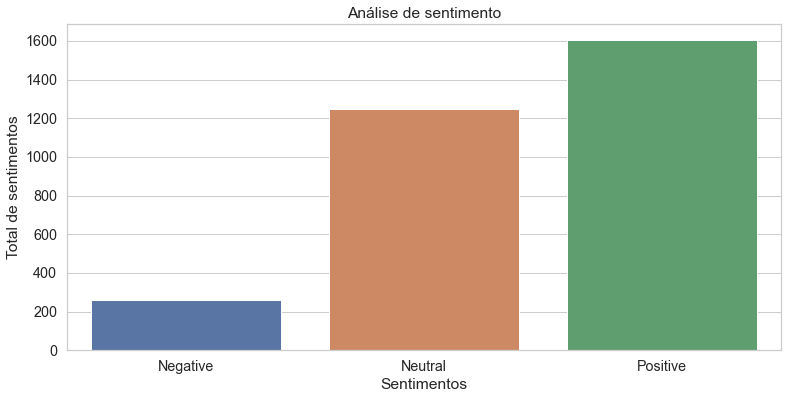

In [25]:
# Gráfico barras de sentimento
plt.figure(figsize=(12.8,6))

ax = sns.countplot(df["Sentimento"])
plt.title("Análise de sentimento")
plt.xlabel("Sentimentos")
plt.ylabel("Total de sentimentos")
plt.show()

Text(0.5, 0, 'Polaridade e Subjetividade')

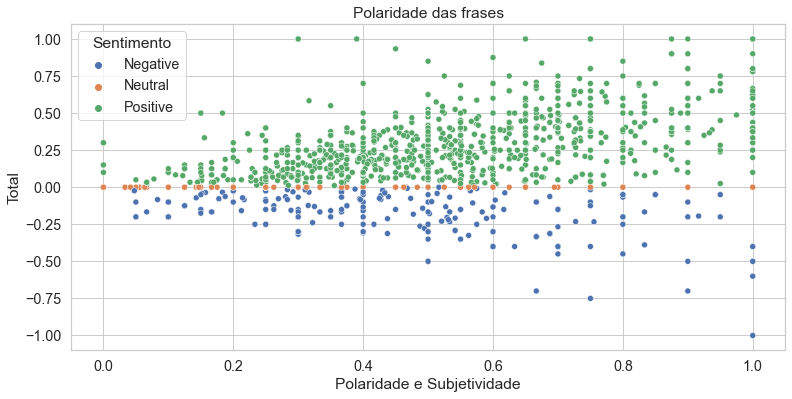

In [26]:
# Gráfico de scatterplot 
plt.figure(figsize=(12.8,6))

ax = sns.scatterplot(x="Subjetividade", y="Polaridade", data=df, hue="Sentimento")
plt.title("Polaridade das frases")
plt.ylabel("Total")
plt.xlabel("Polaridade e Subjetividade")

Text(0, 0.5, 'Total')

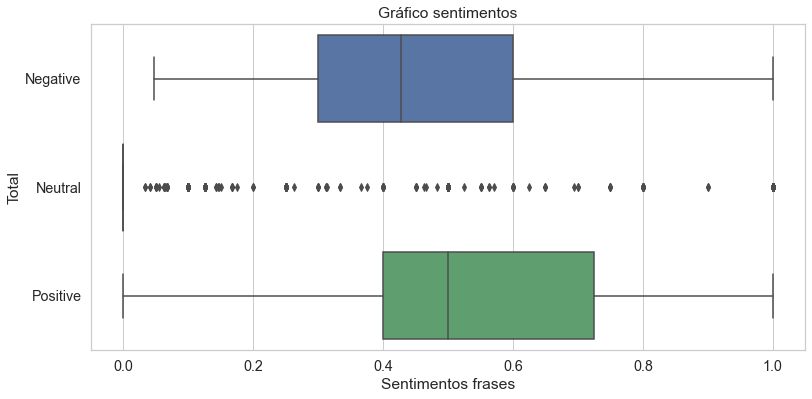

In [27]:
# Gráfico de boxplots - Verificando os dados no boxplot valor total verificando possíveis outliers
plt.figure(figsize=(12.8,6))

ax = sns.boxplot(x="Subjetividade", y="Sentimento", data = df)
plt.title("Gráfico sentimentos")
plt.xlabel("Sentimentos frases")
plt.ylabel("Total")

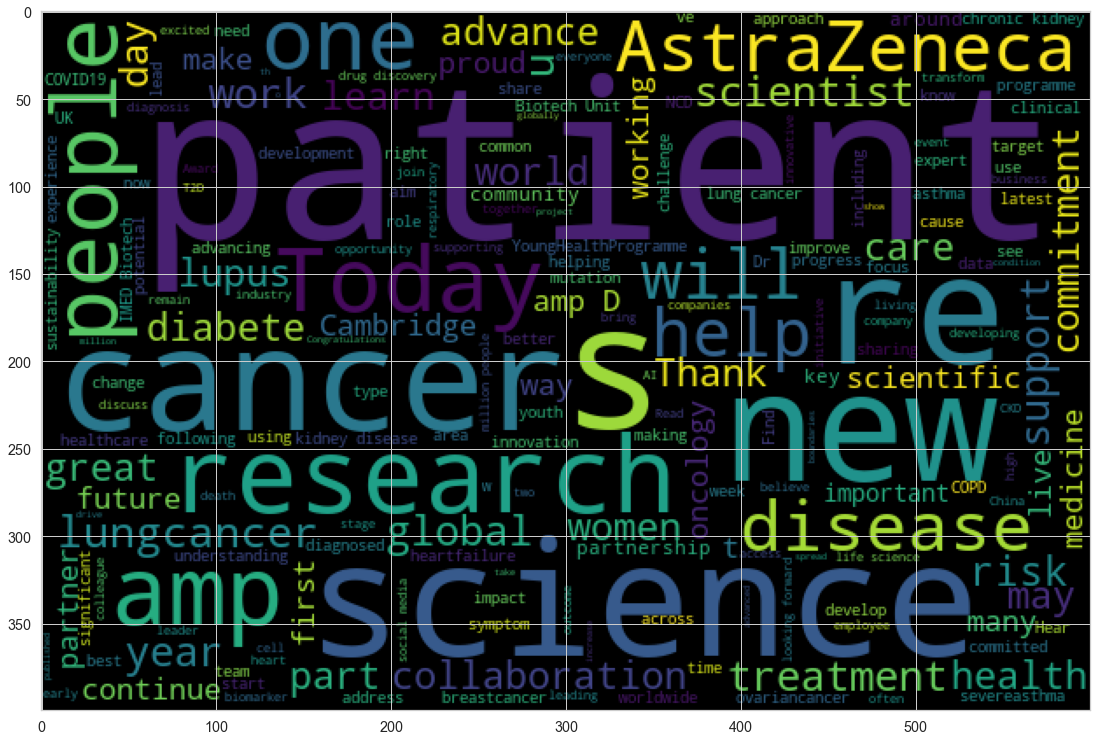

In [28]:
# Nuvem de palavras
words = ' '.join([tweet for tweet in df['Text']])
wordCloud = WordCloud(width=600, height=400).generate(words)

plt.figure(figsize=(18.8, 16))
plt.imshow(wordCloud)
plt.show()

# **Treino teste**
- Treino e teste da base de dados da colunas textos e sentimento

In [29]:
train = df["Text"] # Variável para treino
test = df["Sentimento"] # Variável para teste

In [30]:
# Total de linhas e colunas dados variável x
train.shape

(3117,)

In [32]:
# Total de linhas e colunas dados variável y
test.shape

(3117,)

# **Pré-processamento**

In [33]:
# Dados de limpeza para modelo PLN

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Remove stop words: Removendo as stop words na base de dados
def remove_stop_words(instancia): # Removendo as stop words
    stopwords = set(nltk.corpus.stopwords.words("english"))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

# Palavras derivacionalmente relacionadas com significados semelhantes, palavras para retornar documentos que contenham outra palavra no conjunto.
def text_stemming(instancia):
    stemmer = nltk.stem.RSLPStemmer()
    palavras = []
    for w in instancia.split():
        palavras.append(stemmer.stem(w))
        return (" ".join(palavras))

# Limpeza na base de dados limpando dados de web com http e outros.
def dados_limpos(instancia): 
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
    return (instancia)

#Lemmatization: Em linguística é o processo de agrupar as formas flexionadas de uma palavra para que possam ser analisadas como um único item, identificado pelo lema da palavra , ou forma de dicionário.
def Lemmatization(instancia):
    palavras = []
    for w in instancia.split():
        palavras.append(wordnet_lemmatizer.lemmatize(w))
        return (" ".join(palavras))

# Preprocessing: Pré - processamento da base de dados que serão ser para análise de dados.
def Preprocessing(instancia):
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','').replace('"','')
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

# Função para texto de negações
def marque_negacao(texto):
    
    # Negaçoes do texto mudando para not para "não"
    negacoes = ['não','not']
    negacao_detectada = False
    
    # Criando uma lista vazia 
    resultado = []
    palavras = texto.split()
    
    # For em palavras para os dados de negações 
    for p in palavras:
        p = p.lower()
        if negacao_detectada == True:
            p = p + '_NEG'
        if p in negacoes:
            negacao_detectada = True
        resultado.append(p)
    
    # Retornando a função
    return (" ".join(resultado))

In [34]:
# Base dados limpo
train = [Preprocessing(i) for i in train]
train[:50]

['respiratory syncytial virus, or rsv, is common respiratory virus that is the leading cause of bronchiolitis and…',
 'pioneers in asthma, we continue to push the boundaries of science we’re joining leading experts at ats2021 to…',
 'it takes innovation to transform healthcare experiences patients, but innovation doesn’t happen in isolation l…',
 'every day billions of people are trying to balance living their lives with the limitations posed by chronic disease…',
 'an estimated 37 million people live with chronic kidneydisease in the us and up to 90% are undiagnosed routine te…',
 'rsv is the leading cause of bronchiolitis and pneumonia cases in infants under one year of age and remains leadi…',
 'severe asthma is complex disease that can significantly impact patient health and present unique challenges to he…',
 'to address the urgent crisis in india, we are pledging humanitarian aid that will provide oxygen concentrators, med…',
 'today on worldlupusday we’re recognising and who are

In [35]:
# Tokenização as palavras precisam ser codificadas como inteiros, 
# Ou valores de ponto flutuante, para serem usadas como entradas para modelos machine learning.
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

tokenizer = TweetTokenizer()
vet = CountVectorizer(analyzer="word", tokenizer = tokenizer.tokenize)
vet_train = vet.fit_transform(train)
vet_train.shape

(3117, 6313)

# **Modelo machine learning**

- Modelo 01: Regressão logistica

In [36]:
# Modelo de regressão logistica 

# Importação da biblioteca
from sklearn.linear_model import LogisticRegression

# Nome do algoritmo M.L
model_logistic = LogisticRegression() 

# Treinamento do modelo
model_logistic_fit = model_logistic.fit(vet_train, test)

# Score do modelo dados treino x
model_logistic_score = model_logistic.score(vet_train, test)

# Score do modelo dados treino y
print("Model - Logistic Regression: %.2f" % (model_logistic_score * 100))

Model - Logistic Regression: 99.97


In [37]:
# Previsão modelo com função predict de previsã das frases

model_logistic_pred = model_logistic.predict(vet_train)
model_logistic_pred

array(['Negative', 'Neutral', 'Neutral', ..., 'Positive', 'Positive',
       'Neutral'], dtype=object)

In [38]:
# Previsão modelo com função log_proba de probabilidades das frases

model_logistic_prob = model_logistic.predict_log_proba(vet_train)
model_logistic_prob

array([[-0.24531916, -2.27187928, -2.16781805],
       [-4.28610129, -0.14936577, -2.07954156],
       [-4.3699601 , -0.01984778, -4.9617929 ],
       ...,
       [-4.74575356, -3.98227743, -0.0277121 ],
       [-5.15137683, -4.72776659, -0.01474582],
       [-2.7828555 , -0.16506505, -2.40461961]])

In [39]:
# Acúracia do modelo de Regressão logística
from sklearn import metrics
from sklearn.metrics import accuracy_score

accuracy_dt = accuracy_score(test, model_logistic_pred)
print("Acurácia - Regressão logística: %.2f" % (accuracy_dt * 100))

Acurácia - Regressão logística: 99.97


In [40]:
from sklearn.metrics import confusion_matrix

matrix_1 = confusion_matrix(model_logistic_pred, test)
matrix_1

array([[ 261,    1,    0],
       [   0, 1249,    0],
       [   0,    0, 1606]], dtype=int64)

In [41]:
# Classification report
from sklearn.metrics import classification_report

classification = classification_report(model_logistic_pred, test)
print("Modelo - Regressão logística")
print()
print(classification)

Modelo - Regressão logística

              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       262
     Neutral       1.00      1.00      1.00      1249
    Positive       1.00      1.00      1.00      1606

    accuracy                           1.00      3117
   macro avg       1.00      1.00      1.00      3117
weighted avg       1.00      1.00      1.00      3117



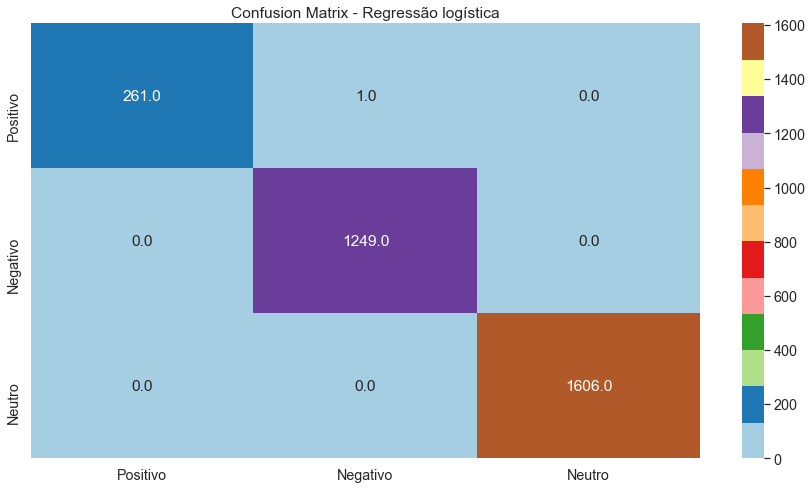

In [42]:
# Plot matriz de confusão
plt.figure(figsize=(15, 8))

ax = plt.subplot()
sns.heatmap(matrix_1, annot=True, ax = ax, fmt = ".1f", cmap="Paired"); 
ax.set_title('Confusion Matrix - Regressão logística'); 
ax.xaxis.set_ticklabels(["Positivo", "Negativo", "Neutro"]); ax.yaxis.set_ticklabels(["Positivo", "Negativo", "Neutro"]);

# **Modelo 02 - Naive bayes**

In [43]:
# Modelo machine learning - Naive bayes

# Importação da biblioteca
from sklearn.naive_bayes import MultinomialNB

# Nome do algoritmo M.L
model_naive_bayes = MultinomialNB()

# Treinamento do modelo
model_naive_bayes_fit = model_naive_bayes.fit(vet_train, test)

# Score do modelo dados treino x
model_naive_bayes_scor = model_naive_bayes.score(vet_train, test)

 # Score do modelo dados treino y
print("Model - Naive Bayes: %.2f" % (model_naive_bayes_scor * 100))

Model - Naive Bayes: 93.07


In [44]:
# Previsão modelo com função predict de previsã das frases

model_naive_bayes_pred = model_naive_bayes.predict(vet_train)
model_naive_bayes_pred

array(['Positive', 'Neutral', 'Neutral', ..., 'Positive', 'Positive',
       'Neutral'], dtype='<U8')

In [45]:
# Previsão modelo com função log_proba de probabilidades das frases

model_naive_bayes_prob = model_naive_bayes.predict_proba(vet_train).round(2)
print(model_naive_bayes_prob)

[[0.42 0.01 0.57]
 [0.   0.7  0.3 ]
 [0.   0.99 0.01]
 ...
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.33 0.66 0.  ]]


In [46]:
# Acúracia do modelo de Naive bayes
accuracy_naive_bayes = metrics.accuracy_score(test, model_naive_bayes_pred)

print("Accuracy model Naive bayes: %.2f" % (accuracy_naive_bayes * 100))

Accuracy model Naive bayes: 93.07


In [47]:
# Confusion matrix
matrix_2 = confusion_matrix(model_naive_bayes_pred, test)
matrix_2

array([[ 163,    3,    3],
       [  46, 1167,   32],
       [  52,   80, 1571]], dtype=int64)

In [48]:
# Classification report
classification = classification_report(model_naive_bayes_pred, test)
print("Modelo - Naive bayes")
print()
print(classification)

Modelo - Naive bayes

              precision    recall  f1-score   support

    Negative       0.62      0.96      0.76       169
     Neutral       0.93      0.94      0.94      1245
    Positive       0.98      0.92      0.95      1703

    accuracy                           0.93      3117
   macro avg       0.85      0.94      0.88      3117
weighted avg       0.94      0.93      0.93      3117



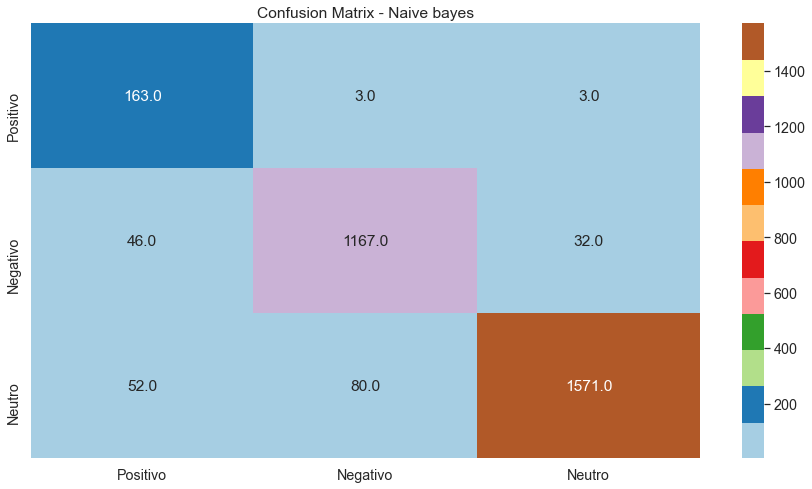

In [49]:
# Plot confusion matrix
plt.figure(figsize=(15, 8))

ax = plt.subplot()
sns.heatmap(matrix_2, annot=True, ax = ax, fmt = ".1f", cmap="Paired"); 
ax.set_title('Confusion Matrix - Naive bayes'); 
ax.xaxis.set_ticklabels(["Positivo", "Negativo", "Neutro"]); ax.yaxis.set_ticklabels(["Positivo", "Negativo", "Neutro"]);

# **Pipeline 1 - Regressão logística**

In [51]:
# Importando bibliotecas do pipeline
from sklearn import svm
from sklearn.pipeline import Pipeline

# Pipeline modelo regressão logística
model_reg_log = Pipeline([
    ('counts', CountVectorizer()),
    ('classifier', LogisticRegression())
])

# Treinamento do pipeline 
model_reg_log.fit(train, test)

# Pipeline simples 
model_reg_log_simples = Pipeline([
  ('counts', CountVectorizer()),
  ('classifier', LogisticRegression())
])

# Treinamento do pipeline
model_reg_log_simples.fit(train, test)

# Pipeline para negações
model_reg_log_negacoes = Pipeline([
  ('counts', CountVectorizer(tokenizer=lambda text: marque_negacao(text))),
  ('classifier', LogisticRegression())
])

# Treinamento do pipeline
model_reg_log_negacoes.fit(train, test)

Pipeline(steps=[('counts',
                 CountVectorizer(tokenizer=<function <lambda> at 0x0000027E14982160>)),
                ('classifier', LogisticRegression())])

In [53]:
# Validação cruzada do modelo
from sklearn.model_selection import cross_val_predict

validacao_cruzada_Reg = cross_val_predict(model_reg_log, train, test)
validacao_cruzada_Reg

array(['Positive', 'Neutral', 'Neutral', ..., 'Positive', 'Positive',
       'Neutral'], dtype=object)

In [54]:
# Acúracia do modelo do pipeline regressão logística
accuracy_1_rg = metrics.accuracy_score(test, validacao_cruzada_Reg)

print("Accuracy pipeline 1 Logistic Regression: %.2f" % (accuracy_1_rg * 100))

Accuracy pipeline 1 Logistic Regression: 80.49


In [55]:
# Classification report do pipeline 
classification = classification_report(validacao_cruzada_Reg, test)
print("Modelo - Pipeline 1 regressão logística")
print()
print(classification)

Modelo - Pipeline 1 regressão logística

              precision    recall  f1-score   support

    Negative       0.31      0.76      0.44       107
     Neutral       0.86      0.76      0.81      1426
    Positive       0.84      0.85      0.85      1584

    accuracy                           0.80      3117
   macro avg       0.67      0.79      0.70      3117
weighted avg       0.83      0.80      0.81      3117



In [56]:
# Confusion matrix pipeline regressão logística
matrix_3 = confusion_matrix(validacao_cruzada_Reg, test)
matrix_3

array([[  81,   13,   13],
       [ 105, 1078,  243],
       [  75,  159, 1350]], dtype=int64)

In [57]:
# Matriz total de sentimentos

sentimento=['Positivo',
            'Negativo',
            'Neutro']

print(pd.crosstab(test, validacao_cruzada_Reg, rownames = ["Real"], colnames=["Predito"], margins = True))

Predito   Negative  Neutral  Positive   All
Real                                       
Negative        81      105        75   261
Neutral         13     1078       159  1250
Positive        13      243      1350  1606
All            107     1426      1584  3117


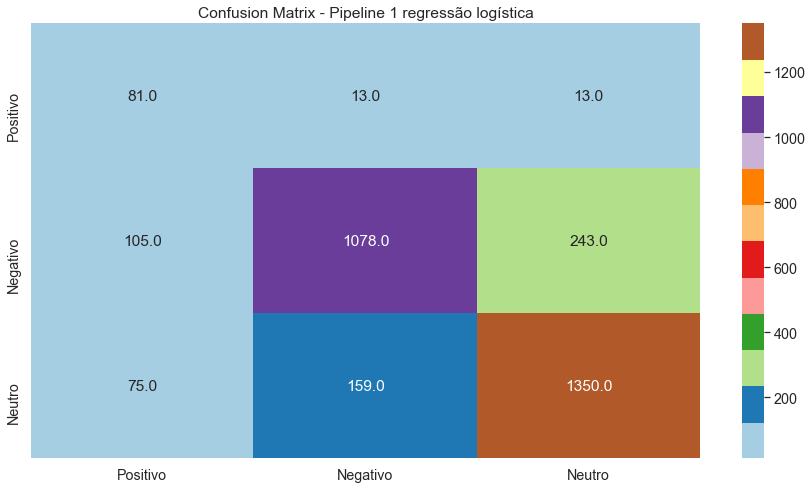

In [58]:
# Plot confusion matrix
plt.figure(figsize=(15, 8))

ax = plt.subplot()
sns.heatmap(matrix_3, annot=True, ax = ax, fmt = ".1f", cmap="Paired"); 
ax.set_title('Confusion Matrix - Pipeline 1 regressão logística'); 
ax.xaxis.set_ticklabels(["Positivo", "Negativo", "Neutro"]); ax.yaxis.set_ticklabels(["Positivo", "Negativo", "Neutro"]);

# **Pipeline 2 - Naive bayes**

In [59]:
# Pipeline simples naive bayes
model_pipeline_simples_2 = Pipeline([
  ('counts', CountVectorizer()),
  ('classifier', MultinomialNB())
])

# Treinamento do pipeline
model_pipeline_simples_2.fit(train, test)

# Pipeline negações
model_pipeline_negacoes_2 = Pipeline([
  ('counts', CountVectorizer(tokenizer=lambda text: marque_negacao(text))),
  ('classifier', MultinomialNB())
])

# Pipeline treinamento
model_pipeline_negacoes_2.fit(train, test)

# Pipeline SVM simples
model_pipeline_svm_simples_2 = Pipeline([
    ("counts", CountVectorizer()),
    ("classifier", svm.SVC(kernel = "linear"))
])
# Treinamento pipeline
model_pipeline_svm_simples_2.fit(train, test)

# Pipeline SVM para negacoes
model_pipeline_svm_negacoes_2 = Pipeline([
    ("counts", CountVectorizer(tokenizer = lambda text: marque_negacao(text))),
    ("classifier", svm.SVC(kernel = "linear"))
])

# Treinamento do pipeline
model_pipeline_svm_negacoes_2.fit(train, test)

Pipeline(steps=[('counts',
                 CountVectorizer(tokenizer=<function <lambda> at 0x0000027E146BA8B0>)),
                ('classifier', SVC(kernel='linear'))])

In [60]:
# Validação cruzada pipeline naive bayes
validacao_cruzada_2 = cross_val_predict(model_pipeline_simples_2, train, test)
validacao_cruzada_2

array(['Positive', 'Positive', 'Neutral', ..., 'Positive', 'Positive',
       'Negative'], dtype='<U8')

In [61]:
# Acúracia do modelo do pipeline naive bayes
accuracy_pipeline_2_nb = metrics.accuracy_score(test, validacao_cruzada_2)
print("Accuracy pipeline 2 - Naive bayes: %.2f" % (accuracy_pipeline_2_nb * 100))

Accuracy pipeline 2 - Naive bayes: 71.70


In [62]:
# Classification report do pipeline 2 
classification = classification_report(validacao_cruzada_2, test)
print("Modelo - Pipeline 2 naive bayes")
print()
print(classification)

Modelo - Pipeline 2 naive bayes

              precision    recall  f1-score   support

    Negative       0.16      0.65      0.25        63
     Neutral       0.60      0.77      0.67       976
    Positive       0.90      0.70      0.79      2078

    accuracy                           0.72      3117
   macro avg       0.55      0.70      0.57      3117
weighted avg       0.79      0.72      0.74      3117



In [63]:
# Matriz total de sentimentos
sentimento=['Positivo',
            'Negativo',
            'Neutro']

print(pd.crosstab(test, 
                  validacao_cruzada_2, 
                  rownames = ["Real"], 
                  colnames=["Predito"], 
                  margins = True))

Predito   Negative  Neutral  Positive   All
Real                                       
Negative        41       84       136   261
Neutral          8      747       495  1250
Positive        14      145      1447  1606
All             63      976      2078  3117


In [64]:
# Confusion matrix pipeline 2 naive bayes
matrix_4 = confusion_matrix(validacao_cruzada_2, test)
matrix_4

array([[  41,    8,   14],
       [  84,  747,  145],
       [ 136,  495, 1447]], dtype=int64)

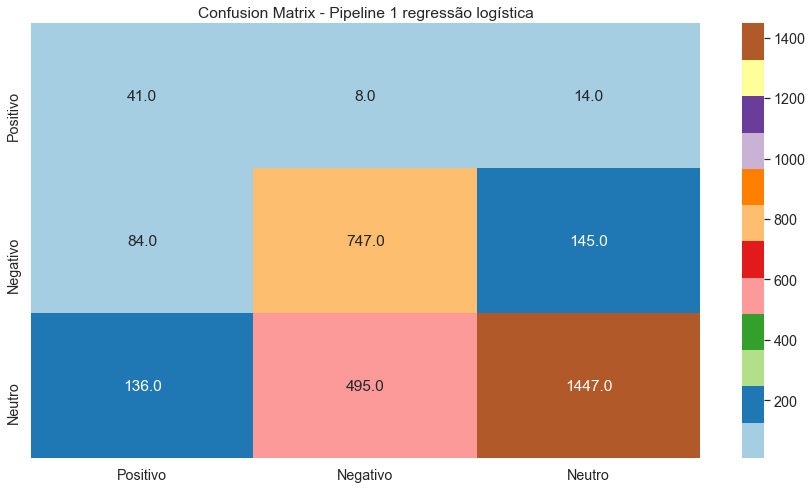

In [65]:
# Plot confusion matrix
plt.figure(figsize=(15, 8))

ax = plt.subplot()
sns.heatmap(matrix_4, annot=True, ax = ax, fmt = ".1f", cmap="Paired"); 
ax.set_title('Confusion Matrix - Pipeline 1 regressão logística'); 
ax.xaxis.set_ticklabels(["Positivo", "Negativo", "Neutro"]); ax.yaxis.set_ticklabels(["Positivo", "Negativo", "Neutro"]);

In [70]:
# Métricas do modelos - Naive Nayes e regressão logística
def metricas_pipeline(model_naive_bayes, train, test):
    validacao_cruzada = cross_val_predict(model_naive_bayes, train, test, cv = 10)
    return "Acurácia do modelo: {}".format(metrics.accuracy_score(validacao_cruzada, test))

def metricas_pipeline(model_logistic, train, test):
    validacao_cruzada_Reg = cross_val_predict(model_logistic, train, test, cv = 10)
    return "Acurácia do modelo: {}".format(metrics.accuracy_score(validacao_cruzada_Reg, test))

print("Pipeline 1 - Naive Bayes")
print()
print("Model pipeline Naive Bayes Simples:", metricas_pipeline(model_pipeline_simples_2, train, test))
print("Model pipeline Naive Bayes negações:", metricas_pipeline(model_pipeline_negacoes_2, train, test))
print("Model pipeline SVM simples:", metricas_pipeline(model_pipeline_negacoes_2, train, test))
print("Model pipeline SVM negacoes:", metricas_pipeline(model_pipeline_svm_negacoes_2, train, test))
print()
print("Pipeline 2 - Regressão Logística")
print()
print("Model pipeline Simples:", metricas_pipeline(model_reg_log, train, test))
print("Model pipeline negações:", metricas_pipeline(model_reg_log_simples, train, test))
print("Model pipeline SVM simples:", metricas_pipeline(model_reg_log_negacoes, train, test))

Pipeline 1 - Naive Bayes

Model pipeline Naive Bayes Simples: Acurácia do modelo: 0.7144690407443054
Model pipeline Naive Bayes negações: Acurácia do modelo: 0.5200513314084055
Model pipeline SVM simples: Acurácia do modelo: 0.5200513314084055
Model pipeline SVM negacoes: Acurácia do modelo: 0.5319217196021816

Pipeline 2 - Regressão Logística

Model pipeline Simples: Acurácia do modelo: 0.8129611806223933
Model pipeline negações: Acurácia do modelo: 0.8129611806223933
Model pipeline SVM simples: Acurácia do modelo: 0.5255052935514918


In [71]:
# Resultados - Modelos machine learning

modelos = pd.DataFrame({
    
    "Models" :["Pipeline 1 - Regressão logistica", 
               "Pipeline 2 - Naive Bayes"],

    "Acurácia" :[accuracy_pipeline_2_nb,
                 accuracy_1_rg]})

modelos.sort_values(by = "Acurácia", ascending = False)

,Models,Acurácia
1,Pipeline 2 - Naive Bayes,0.804941
0,Pipeline 1 - Regressão logistica,0.717036


In [72]:
## Salvando modelo M.L

import pickle
 
with open('model_logistic_pred.pkl', 'wb') as file:
    pickle.dump(model_logistic_pred, file)
    
with open('model_naive_bayes_pred.pkl', 'wb') as file:
    pickle.dump(model_naive_bayes_pred, file)